In [1]:
import numpy as np
from scipy.io import loadmat,savemat
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm 


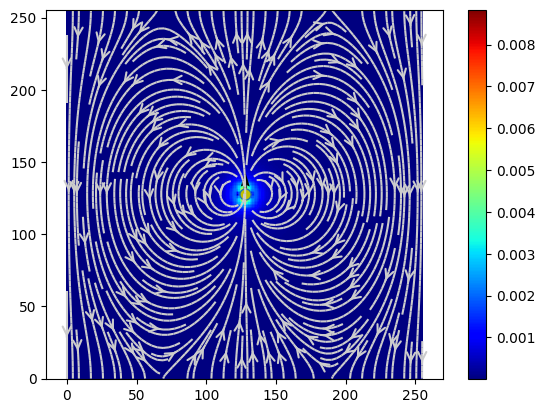

In [2]:


Nx = 256 
Ny = 256   # number of grid points.
Np = 1     # number particles.

xx = np.arange(0, Nx) 
yy = np.arange(0, Ny) 
x, y = np.meshgrid(xx, yy) 
r = np.zeros(2*Np)
p = np.zeros(2*Np)
fx = np.zeros((Nx, Ny))
fy = np.zeros((Nx, Ny))
Fxk = np.zeros((Nx, Ny), dtype=np.complex128)
Fyk = np.zeros((Nx, Ny), dtype=np.complex128)

# Fourier grid.
kx = 2 * np.pi / Nx * np.concatenate((np.arange(0, Nx/2+1,1),np.arange(-Nx/2+1, 0, 1)))
ky = 2 * np.pi / Ny * np.concatenate((np.arange(0, Nx/2+1,1),np.arange(-Nx/2+1, 0, 1)))
kx, ky = np.meshgrid(kx, ky) 


for i in range(Np):
    r[i ] = Nx/2 - (Np-1)*20 + 40*i
    r[i + Np] = Ny/2
    p[i] = 0
    p[i + Np] = 1   

sigma = 3 
scale = ( 2 * np.pi * sigma**2 )**(- 2/2)

arg = ( (x - Nx/2 )**2 + (y - Ny/2)**2 ) / (2 * sigma**2)
fx0 =  np.exp(-arg) * scale
Fk0 = np.fft.fft2(fx0)

ksq = kx*kx + ky*ky
ksq[0, 0] = 1.0

# calculations in Fourier space
for i in range(Np):
    kdotr = kx*(r[i] - Nx/2) + ky*(r[i + Np] -Ny/2) 
    Fxk += Fk0*p[i]      * ksq  * np.exp(-1j * kdotr) 
    Fyk += Fk0*p[i + Np] * ksq  * np.exp(-1j * kdotr)

Fdotk = Fxk*kx + Fyk*ky

vxk = ( Fxk - Fdotk*(kx / ksq) ) / ksq
vyk = ( Fyk - Fdotk*(ky / ksq) ) / ksq

vxk[0, 0] = 0
vyk[0, 0] = 0

vx = np.real(np.fft.ifft2(vxk))
vy = np.real(np.fft.ifft2(vyk))


## plotting business
plt.figure()
px = p[0:Np]
py = p[Np:2*Np]
rx = r[0:Np]
ry = r[Np:2*Np]
plt.pcolor(x, y, np.sqrt(vx*vx + vy*vy), cmap=cm.jet)
plt.colorbar()
plt.plot(rx, ry, marker='o', markerfacecolor='y', markersize=8 ) 
plt.streamplot(x, y, vx, vy, density=2, color=[0.8,0.8,0.8], arrowstyle='->', arrowsize =1.5)
plt.quiver(rx, ry, px,py, angles='xy', scale_units='xy')
plt.show()                                                                                                                                     

